In [15]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/'      # carpeta donde se encuentran los datasets
else:
    DATOS_DIR   = '/home/jovyan/work/data/' # carpeta LOCAL donde se encuentran los datasets


Importamos las librerías y abrimos el archivo

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datos = pd.read_csv( DATOS_DIR + 'Drug5.csv')
#datos = pd.read_csv(DATOS_DIR + 'Drug5_atipicos.csv')

Accediendo a los datos

In [3]:
# dtypes visualiza los tipos de datos del DataFrame
print(datos.dtypes)
print('\n')

Age              int64
Sex             object
BP              object
Cholesterol     object
Na             float64
K              float64
Drug            object
dtype: object




In [4]:
# Primeras 5 filas del dataframe
datos.head()

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61,F,LOW,HIGH,0.559294,0.030998,drugY


In [5]:
datos

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61,F,LOW,HIGH,0.559294,0.030998,drugY
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,0.848774,0.073380,drugC
196,16,M,LOW,HIGH,0.743021,0.061886,drugC
197,52,M,NORMAL,HIGH,0.549945,0.055581,drugX
198,23,M,NORMAL,NORMAL,0.784520,0.055959,drugX


In [6]:
# -- METADATOS –
datos.describe()

,Age,Na,K
count,200.000000,200.000000,200.000000
mean,44.315000,0.697095,0.050174
std,16.544315,0.118907,0.017611
min,15.000000,0.500169,0.020022
25%,31.000000,0.583887,0.035054
50%,45.000000,0.721853,0.049663
75%,58.000000,0.801494,0.066000
max,74.000000,0.896056,0.079788


In [7]:
# Sólo los atributos categóricos
datos.describe(include=[object])

# Todos los atributos
# datos.describe(include='all')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91


### MEDIDAS ESTADISTICAS

In [8]:
# Media, mediana y moda del atributo AGE

media = datos["Age"].mean()
mediana = datos["Age"].median()
moda = datos["Age"].mode()

print("Media %.1f" % media)
print("Mediana: %.1f \nModa: %.1f" % (mediana,moda))

Media 44.3
Mediana: 45.0 
Moda: 47.0


In [9]:
# Calculando la media de cada atributo numérico

medias = datos.mean()
print(medias)
print("\nEdad promedio :", medias[0])

Age    44.315000
Na      0.697095
K       0.050174
dtype: float64

Edad promedio : 44.315


## Gráficos

### Diagrama de Barras

drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64


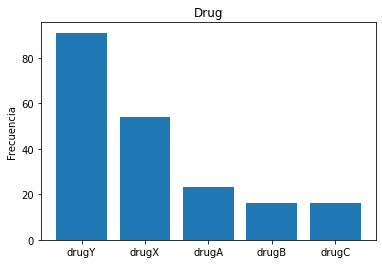

In [10]:
barras = pd.value_counts(datos['Drug'])
print(barras)

plt.figure()
N = len(barras)
plt.bar(np.arange( N ), barras)  # Gráfico de barras
plt.title('Drug')      # Colocamos el título
plt.ylabel('Frecuencia')
# Colocamos las etiquetas del eje x
plt.xticks(np.arange( N ), barras.index)
plt.show()


### Gráfico de torta

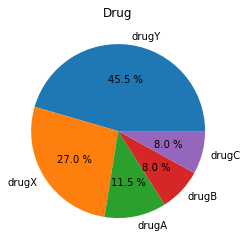

In [11]:
plt.figure()
barras = pd.value_counts(datos['Drug'])
plt.pie(barras,labels=barras.index, autopct="%0.1f %%")
plt.title('Drug')
plt.show()


### Histograma

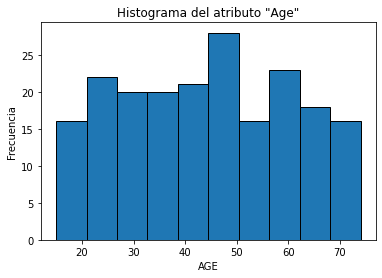

In [12]:
plt.figure()
plt.hist(datos['Age'], bins = 10, edgecolor = 'black', \
         linewidth=1)
plt.xlabel('AGE')
plt.ylabel('Frecuencia')
plt.title('Histograma del atributo "Age"')
plt.show()


### Diagrama de Caja

CUARTILES - atributo AGE =  [31. 45. 58.]


<AxesSubplot:>

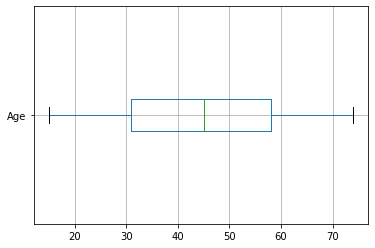

In [13]:
# Cuartiles
Q = datos["Age"].quantile([0.25, 0.5, 0.75]).values
print("CUARTILES - atributo AGE = ", Q)

# Diagram de caja de Tukey del atributo AGE

datos.boxplot(column=['Age'], vert=False)

<AxesSubplot:title={'center':'Age'}, xlabel='Cholesterol'>

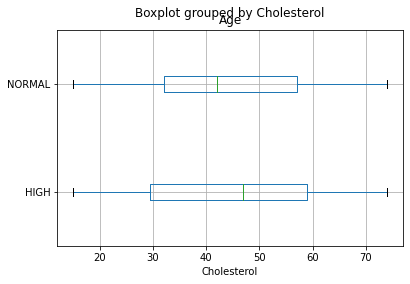

In [14]:
# Diagrma de AGE agrupado por el nivel de colesterol
datos.boxplot(column=['Age'], by='Cholesterol', vert=False)

In [15]:
dfNormal = datos.Age[datos.Cholesterol=='NORMAL']
QNormal = dfNormal.quantile([0.25, 0.5, 0.75]).values
print("CUARTILES - Edades c/Colesterol NORMAL")
print(QNormal)

dfHigh =  datos.Age[datos.Cholesterol=='HIGH']
QHigh = dfHigh.quantile([0.25, 0.5, 0.75]).values
print("CUARTILES - Edades c/Colesterol HIGH")
print(QHigh)

CUARTILES - Edades c/Colesterol NORMAL
[32. 42. 57.]
CUARTILES - Edades c/Colesterol HIGH
[29.5 47.  59. ]


### Diagrama de dispersión

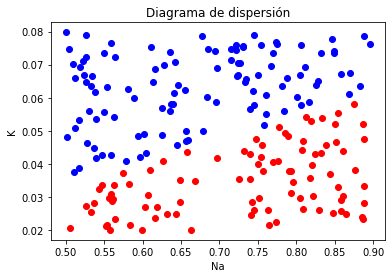

In [16]:
plt.figure()
plt.plot(datos.Na[datos.Drug=="drugY"], datos.K[datos.Drug=="drugY"], 'or')
plt.plot(datos.Na[datos.Drug!="drugY"], datos.K[datos.Drug!="drugY"], 'ob')
plt.xlabel('Na')
plt.ylabel('K')
plt.title('Diagrama de dispersión')
plt.show()